In [9]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt 
import numpy as np

train_df = pd.read_csv("BostonHouseTrain.csv", index_col=0)
test_df = pd.read_csv("BostonHouseTest.csv", index_col=0)

x_train = train_df.iloc[:,0:13]
y_train = train_df["class"]

x_test = test_df.iloc[:,0:13]
y_test = test_df['class']

In [98]:
wl = DecisionTreeClassifier(random_state=0, max_depth=2)
wl.fit(x_train,y_train)

y_pred_train = wl.predict(x_test)
acc = accuracy_score(y_test,y_pred_train)
acc

0.7830188679245284

# Question 2

In [4]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0, max_depth=2),n_estimators=100,random_state=0).fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc2 = accuracy_score(y_test,y_pred)
acc2

0.8113207547169812

# Question 3

In [5]:
frame = pd.DataFrame(columns=["nb_tress","testAcc"])
for i in range(1,100):
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0, max_depth=2,min_samples_split=18),n_estimators=i,random_state=0).fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    frame.loc[i] = [i, accuracy]

In [6]:
frame

,nb_tress,testAcc
1,1.0,0.783019
2,2.0,0.801887
3,3.0,0.764151
4,4.0,0.811321
5,5.0,0.773585
...,...,...
95,95.0,0.811321
96,96.0,0.811321
97,97.0,0.811321
98,98.0,0.811321


Text(0, 0.5, 'Test accuracy')

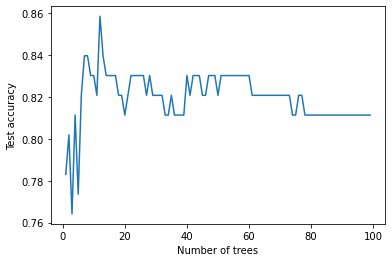

In [7]:
plt.plot(frame["nb_tress"], frame["testAcc"])
plt.xlabel("Number of trees")
plt.ylabel("Test accuracy")

# Question 4

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
p = rf.predict(x_test)
accu = accuracy_score(y_test,p)
accu

0.839622641509434

In [9]:
f = pd.DataFrame(columns=["nb_trees","acc"])

for i in range(1,200):
    m = RandomForestClassifier(n_estimators=i)
    m.fit(x_train,y_train)
    predict = m.predict(x_test)
    a = accuracy_score(y_test,predict)
    f.loc[i] = [i, a]

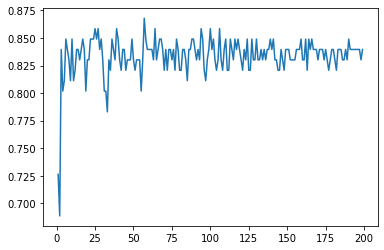

In [10]:
plt.plot(f["nb_trees"],f["acc"])

In [25]:
f1 = pd.DataFrame(columns=["nb_trees","acc"])

for i in range(1,200):
    m1 = RandomForestClassifier(max_depth=i)
    m1.fit(x_train,y_train)
    predict1 = m1.predict(x_test)
    a1 = accuracy_score(y_test,predict1)
    f1.loc[i] = [i, a1]

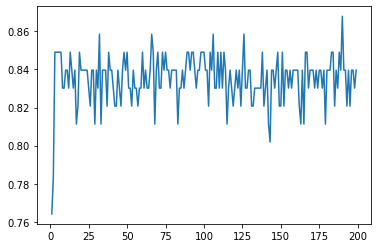

In [26]:
plt.plot(f1["nb_trees"],f1["acc"])

In [27]:
f2 = pd.DataFrame(columns=["nb_trees","acc"])

for i in range(2,200):
    m2 = RandomForestClassifier(min_samples_split=i)
    m2.fit(x_train,y_train)
    predict2 = m2.predict(x_test)
    a2 = accuracy_score(y_test,predict2)
    f2.loc[i] = [i, a2]

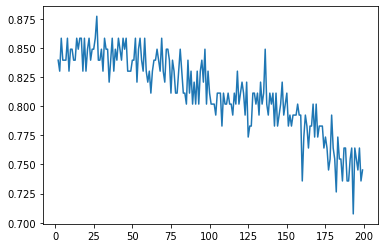

In [28]:
plt.plot(f2["nb_trees"],f2["acc"])

In [30]:
f3 = pd.DataFrame(columns=["nb_trees","acc"])

for i in range(2,200):
    m3 = RandomForestClassifier(min_samples_leaf=i)
    m3.fit(x_train,y_train)
    predict3 = m3.predict(x_test)
    a3 = accuracy_score(y_test,predict3)
    f3.loc[i] = [i, a3]

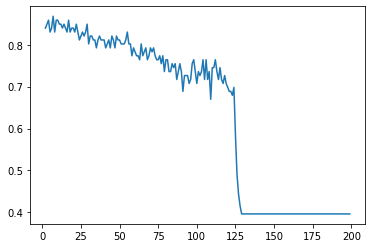

In [31]:
plt.plot(f3["nb_trees"],f3["acc"])

In [34]:
f4 = pd.DataFrame(columns=["nb_trees","acc"])

for i in range(1,14):
    m4 = RandomForestClassifier(max_features=i)
    m4.fit(x_train,y_train)
    predict4 = m4.predict(x_test)
    a4 = accuracy_score(y_test,predict4)
    f4.loc[i] = [i, a4]

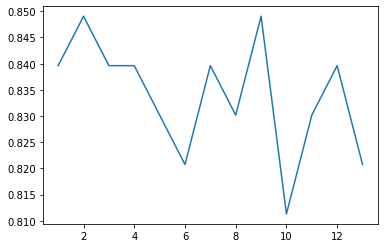

In [37]:
plt.plot(f4["nb_trees"],f4["acc"])

In [41]:
f5 = pd.DataFrame(columns=["nb_trees","acc"])

for i in np.arange(0,0.5,0.1):
    m5 = RandomForestClassifier(min_weight_fraction_leaf=i)
    m5.fit(x_train,y_train)
    predict5 = m5.predict(x_test)
    a5 = accuracy_score(y_test,predict5)
    f5.loc[i] = [i, a5]

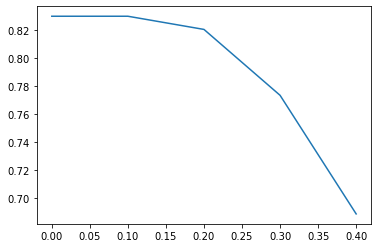

In [42]:
plt.plot(f5["nb_trees"],f5["acc"])

In [46]:
f6 = pd.DataFrame(columns=["nb_trees","acc"])

for i in np.arange(2,100):
    m6 = RandomForestClassifier(max_leaf_nodes=i)
    m6.fit(x_train,y_train)
    predict6 = m6.predict(x_test)
    a6 = accuracy_score(y_test,predict6)
    f6.loc[i] = [i, a6]

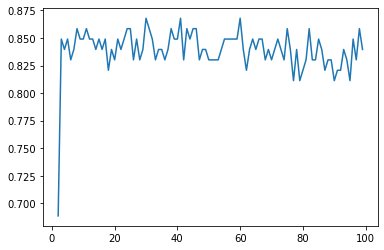

In [47]:
plt.plot(f6["nb_trees"],f6["acc"])

In [49]:
f7 = pd.DataFrame(columns=["nb_trees","acc"])

for i in np.arange(0,0.1,0.001):
    m7 = RandomForestClassifier(ccp_alpha=i)
    m7.fit(x_train,y_train)
    predict7 = m7.predict(x_test)
    a7 = accuracy_score(y_test,predict7)
    f7.loc[i] = [i, a7]

In [66]:
f7['acc'].idxmax()

0.008

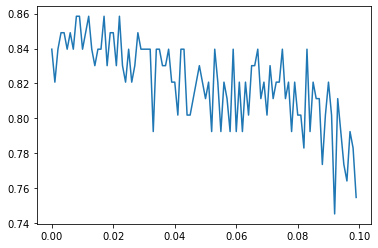

In [50]:
plt.plot(f7["nb_trees"],f7["acc"])

In [12]:
data = pd.DataFrame(columns=["nb_estimators","max_depth","max_feature",'accTest'])
counter = 1

for i in range(50,85):#nb_estimators
    for j in range(25,200,5): #max depth
        #for k in range(2,25): #min samples split
            for h in range(6,10): #max feature
                #for g in range(30,60): #max leaf nodes
                    #for m in np.arange(0,0.02,0.005): #ccp alpha
                        mod = RandomForestClassifier(n_estimators=i, max_depth=j,  max_features=h, random_state=0)
                        mod.fit(x_train,y_train)
                        pred_final = mod.predict(x_test)
                        ac = accuracy_score(y_test,pred_final)
                        data.loc[counter] = [i,j,h,ac]
                        counter += 1


In [13]:
data['accTest'].max()

0.8584905660377359

In [14]:
data['accTest'].idxmax()

2523

In [16]:
data[2520:2525]

,nb_estimators,max_depth,max_feature,accTest
2521,68.0,25.0,6.0,0.820755
2522,68.0,25.0,7.0,0.820755
2523,68.0,25.0,8.0,0.858491
2524,68.0,25.0,9.0,0.830189
2525,68.0,30.0,6.0,0.820755


In [22]:
data1 = pd.DataFrame(columns=["max_leaf_node","min_sample_split","ccp",'accTest'])
counter1 = 1

for k in range(2,25): #min samples split
    for g in range(30,60): #max leaf nodes
            for m in np.arange(0,0.02,0.001): #ccp alpha
                mod1 = RandomForestClassifier(max_leaf_nodes=g,min_samples_split=k,ccp_alpha=m,n_estimators=68, max_depth=25,  max_features=8, random_state=0)
                mod1.fit(x_train,y_train)
                pred_final1 = mod1.predict(x_test)
                ac1 = accuracy_score(y_test,pred_final1)
                data1.loc[counter1] = [g,k,m,ac1]
                counter1 += 1


In [97]:
test = RandomForestClassifier(n_estimators=30,min_samples_split=3,random_state=0,max_depth=25,max_features=8,ccp_alpha=0.003, max_leaf_nodes=30)
test.fit(x_train,y_train)
pred_test = test.predict(x_test)
acc_test = accuracy_score(y_test,pred_test)
acc_test

0.8773584905660378

In [25]:
data1[data1['accTest'].idxmax()-2:data1['accTest'].idxmax()+2]

,max_leaf_node,min_sample_split,ccp,accTest
604,30.0,3.0,0.003,0.858491
605,30.0,3.0,0.004,0.867925
606,30.0,3.0,0.005,0.849057
607,30.0,3.0,0.006,0.849057


In [20]:
data1['accTest'].idxmax()

137

In [21]:
data1[135:140]

,max_leaf_node,min_sample_split,ccp,accTest
136,33.0,3.0,0.015,0.839623
137,34.0,3.0,0.000,0.867925
138,34.0,3.0,0.005,0.839623
139,34.0,3.0,0.010,0.858491
140,34.0,3.0,0.015,0.839623


In [132]:
mode = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=18, max_features=7, max_leaf_nodes=55, ccp_alpha=0.005,random_state=0)
mode.fit(x_train,y_train)
y = mode.predict(x_test)
o = accuracy_score(y_test,y)
o

0.8490566037735849

# MultiProcessing

In [14]:
import os
import time
import glob
import random
import nltk
import numpy as np
from functools import reduce
import concurrent.futures

numbers = [200000, 200000, 200000]

def calculation(number):
    random_list = random.sample(range(10000000), number)
    return reduce(lambda x, y: x*y, random_list)

In [19]:
start = time.time()
with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(calculation, numbers)
    end = time.time()
print("MultiProcessing computation: {} secs ".format(end - start))

MultiProcessing computation: 0.01300191879272461 secs 


In [14]:
start = time.time()
for i in numbers:
    result = calculation(i)
end = time.time()
print("Series computation: {} sec".format(end - start))

Series computation: 37.27358651161194 sec


In [15]:
start = time.time()
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(calculation, numbers)   
end = time.time()
print("Multithreading computation: {} secs ".format(end - start))

Multithreading computation: 38.28895092010498 secs 


In [31]:
def test():
    tmp = 0
    for i in range(100000):
        for j in range(10000):
            tmp += 1

In [32]:
start = time.time()
test()
end = time.time()
print("Multithreading computation: {} secs ".format(end - start))

Multithreading computation: 41.54795026779175 secs 


In [33]:
start = time.time()
with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(test)
    end = time.time()
print("MultiProcessing computation: {} secs ".format(end - start))

MultiProcessing computation: 0.001001119613647461 secs 


In [25]:
import multiprocessing as mp
pool = mp.Pool(mp.cpu_count())

def mul():

    data1 = pd.DataFrame(columns=["max_leaf_node","min_sample_split","ccp",'accTest'])
    counter1 = 1

    for k in range(2,25): #min samples split
        for g in range(30,60): #max leaf nodes
                for m in np.arange(0,0.02,0.001): #ccp alpha
                    mod1 = RandomForestClassifier(max_leaf_nodes=g,min_samples_split=k,ccp_alpha=m,n_estimators=68, max_depth=25,  max_features=8, random_state=0)
                    mod1.fit(x_train,y_train)
                    pred_final1 = mod1.predict(x_test)
                    ac1 = accuracy_score(y_test,pred_final1)
                    data1.loc[counter1] = [g,k,m,ac1]
                    counter1 += 1

    return data1

In [ ]:
result = pool.apply(mul)